# Read csv files and plot learning curves for FedAvg experiment 3a

In [1]:
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import os
from os import walk
from os.path import join
os.getcwd()

'C:\\Users\\wangyuan\\myfl-1\\Federated-Learning-PyTorch'

In [3]:
file_path_1 = 'save\\figures-cifar\\data_src_exp_3a'
_, _, filenames_1 = next(walk(file_path_1))
files_to_read_1 = [join(file_path_1,f) for f in filenames_1]
df_1 = [pd.read_csv(f) for f in files_to_read_1]

In [4]:
# manually set the label names
run_labels=[0]*7
run_labels[0] = 'SGD, $\eta=0.01$'
run_labels[1] = 'FedSGD, $\eta=0.1$'
run_labels[2] = 'FedSGD, $\eta=0.2$'
run_labels[3] = 'FedSGD, $\eta=0.5$'
run_labels[4] = 'FedAvg, $\eta=0.03$'
run_labels[5] = 'FedAvg, $\eta=0.05$'
run_labels[6] = 'FedAvg, $\eta=0.1$'

# define linestyle and color
run_colors, run_linestyles = [0]*7, [0]*7

run_colors[0] = 'limegreen'
run_colors[1] = 'deeppink'
run_colors[2] = 'red'
run_colors[3] = 'gold'
run_colors[4] = 'dodgerblue'
run_colors[5] = 'lightsteelblue'
run_colors[6] = 'lightslategrey'

run_linestyles[0] = '--'
run_linestyles[1] = '-'
run_linestyles[2] = '-'
run_linestyles[3] = '-'
run_linestyles[4] = '-'
run_linestyles[5] = '-'
run_linestyles[6] = '-'

# # define the x-axle scaling factor to allow for comparison in minibatch update amount
# xsf = [0]*7
# xsf[0]=1000
# xsf[1]=50
# xsf[2]=100
# xsf[3]=500
# xsf[4]=1000
# xsf[5]=2000
# xsf[6]=5000

### choosing color and linestyle
Please see https://matplotlib.org/stable/gallery/color/named_colors.html and https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

Text(0, 0.5, 'Test acc')

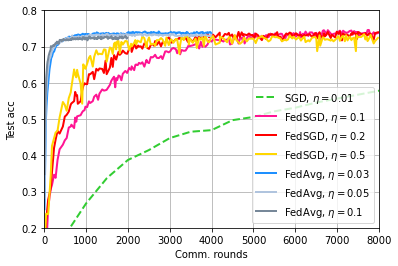

In [5]:
# plot the first figure for experiment 2 with iid data 
step_1=5
plt.figure()
for i, data in enumerate(df_1):
    if i==0:
        sf, step_1 = 500, 1
    else:
        sf, step_1 = 1, 5
    x = [dx*sf for j, dx in enumerate(data['Step'].tolist()) if j % step_1 == 0]
    y = [dy for j, dy in enumerate(data['Value'].tolist()) if j % step_1 == 0]   
    plt.plot(x,y,label=run_labels[i], linestyle=run_linestyles[i], color=run_colors[i],linewidth=2)
#     plt.plot(x,y,label=run_labels[i],linewidth=2)
    plt.legend(loc='lower right')
plt.grid()
# plt.tight_layout()
plt.xlim(0,8000)
plt.ylim(0.2,0.8)
plt.xlabel('Comm. rounds')
plt.ylabel('Test acc')
# plt.savefig('save\\figures-cifar\\fedavg-exp-3a.png')